Predecir el titulo del trabajo

In [16]:
from google.colab import files
uploaded = files.upload()

Saving cleanjobs.csv to cleanjobs (1).csv


In [17]:
import io
import pandas as pd
datos_jobs = pd.read_csv(io.BytesIO(uploaded['cleanjobs.csv']))

datos_jobs

,IDJOB,Job_Experience_Required,Key_Skills,Role_Category,Job_Title
0,1,0-3 Anios,Javascript|Php|Ajax|Jquery|Json|Laravel|Drupal...,Programacion y Diseno,Desarrollador Junior
1,2,4-7 Anios,Microservicios|MVC|Java EE|Patrones de Diseno|...,Programacion y Diseno,Desarrollador Semisenior
2,3,8-16 Anios,Microservicios|Opengl|Diseno de sistemas|Desar...,Programacion y Diseno,Desarrollador Senior
3,4,0-6 Anios,Sql|MySql|MongoDB|Asp.net|Ado.net|Oracle|Postr...,Programacion y Diseno,Desarrollador Backend
4,5,0-3 Anios,WordPress|Joomla|Tortaphp| Zend|Html|CSS|Boots...,Programacion y Diseno,Desarrollador de Contenido Web
5,6,0-3 Anios,Html|CSS|Bootstrap|Photoshop,Programacion y Diseno,Disenador Web
6,7,3-8 Anios,Photoshop|Ilustrador| Bellas artes|Diseno de s...,Programacion y Diseno,Artista senior del juego
7,8,6-11 Anios,Acciones|Estudios de mercado|Habilidades de co...,Servicios Financieros - Banca - Inversiones -...,Asesor de renta variable senior
8,9,3-5 Anios,Ejecutivo de cuentas|Contable|Gestion de exist...,Contabilidad,Asistente de contabilidad
9,10,2-7 Anios,Ingenieria de Ventas,Gerente de Ventas,Ingeniero de Ventas


Verificar datos

In [18]:
datos_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   IDJOB                    12 non-null     int64 
 1   Job_Experience_Required  12 non-null     object
 2   Key_Skills               12 non-null     object
 3   Role_Category            12 non-null     object
 4   Job_Title                12 non-null     object
dtypes: int64(1), object(4)
memory usage: 608.0+ bytes


In [19]:
datos_jobs.describe()

,IDJOB
count,12.000000
mean,6.500000
std,3.605551
min,1.000000
25%,3.750000
50%,6.500000
75%,9.250000
max,12.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc18d4d6bd0>]],
      dtype=object)

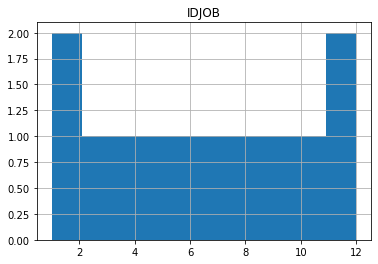

In [20]:
datos_jobs.hist()

Se eliminan los datos inecesarios para el 

In [21]:
datos_jobs = datos_jobs.drop(columns=['Key_Skills'])
datos_jobs = datos_jobs.drop(columns=['Role_Category'])
datos_jobs = datos_jobs.drop(columns=['Job_Title'])
datos_jobs

,IDJOB,Job_Experience_Required
0,1,0-3 Anios
1,2,4-7 Anios
2,3,8-16 Anios
3,4,0-6 Anios
4,5,0-3 Anios
5,6,0-3 Anios
6,7,3-8 Anios
7,8,6-11 Anios
8,9,3-5 Anios
9,10,2-7 Anios


Se obtienen los datos no numericos

In [22]:
datos_jobs['Job_Experience_Required'].unique()

array(['0-3 Anios', '4-7 Anios', '8-16 Anios', '0-6 Anios', '3-8 Anios',
       '6-11 Anios', '3-5 Anios', '2-7 Anios', '12-18 Anios',
       '6-10 Anios'], dtype=object)

Se remplazan los datos por un valor numerico

In [23]:
valores_anios = {"Job_Experience_Required":  {'0-3 Anios':1, '4-7 Anios':2, '8-16 Anios':3, '0-6 Anios':4, '3-8 Anios':5, '6-11 Anios':6, '3-5 Anios':7, '2-7 Anios':8, '12-18 Anios': 9, '6-10 Anios': 10}}
datos_jobs.replace(valores_anios, inplace=True)
datos_jobs

,IDJOB,Job_Experience_Required
0,1,1
1,2,2
2,3,3
3,4,4
4,5,1
5,6,1
6,7,5
7,8,6
8,9,7
9,10,8


In [24]:
datos_jobs['Job_Experience_Required'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Analizamos los datos con ciertas graficas

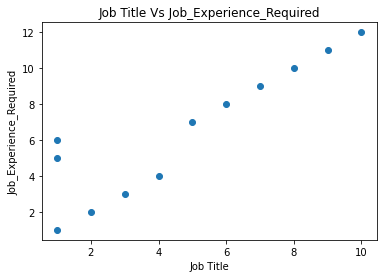

In [26]:
import matplotlib.pyplot as plt
plt.scatter(x = datos_jobs['Job_Experience_Required'], y = datos_jobs['IDJOB'])
plt.title('Job Title Vs Job_Experience_Required')
plt.xlabel('Job Title')
plt.ylabel('Job_Experience_Required')
plt.show()

Entrenamiento del Modelo

Separamos los datos entre entrenamiento (80%) y test (20%)

In [27]:
datos_entrenamiento = datos_jobs.sample(frac=0.8,random_state=0)
datos_test = datos_jobs.drop(datos_entrenamiento.index)

In [28]:
datos_entrenamiento

,IDJOB,Job_Experience_Required
6,7,5
11,12,10
4,5,1
10,11,9
2,3,3
8,9,7
1,2,2
7,8,6
9,10,8
3,4,4


In [29]:
datos_test

,IDJOB,Job_Experience_Required
0,1,1
5,6,1


In [30]:
etiquetas_entrenamiento = datos_entrenamiento.pop('IDJOB')
etiquetas_test = datos_test.pop('IDJOB')

In [31]:
etiquetas_entrenamiento

6      7
11    12
4      5
10    11
2      3
8      9
1      2
7      8
9     10
3      4
Name: IDJOB, dtype: int64

In [32]:
etiquetas_test

0    1
5    6
Name: IDJOB, dtype: int64

In [33]:
datos_entrenamiento

,Job_Experience_Required
6,5
11,10
4,1
10,9
2,3
8,7
1,2
7,6
9,8
3,4


Entrenar el modelo con Regresión Lineal

In [34]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(datos_entrenamiento,etiquetas_entrenamiento)

LinearRegression()

In [35]:
predicciones = modelo.predict(datos_test)
predicciones

array([2.27272727, 2.27272727])

Se compara con el valor real

In [36]:
import numpy as np
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(etiquetas_test, predicciones))
print("Error porcentual : %f" % (error*100))

Error porcentual : 278.499521


El margen de error es demasiado amplio por lo que la predicción es posible que no sea la mas adecuada

Se ejecuta una predicción para un año en especifico

In [37]:
nuevo_anio_exp = pd.DataFrame(np.array([[10]]),columns=['Job_Experience_Required'])
nuevo_anio_exp

,Job_Experience_Required
0,10


In [ ]:
modelo.predict(nuevo_anio_exp)

array([11.92727273])